In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy import stats

In [ ]:
train_df = pd.read_csv('train_features.csv')
drug_df = pd.read_csv('train_drug.csv')

In [ ]:

train_df['cp_type'].replace(['ctl_vehicle', 'trt_cp'], [0,1], inplace=True)
train_df['cp_dose'].replace(['D1','D2'],[0,1],inplace = True)


In [ ]:
#87d714366
#9f80f3f77
#8b87a7a83

train_df = pd.concat([drug_df['drug_id'], train_df],axis=1)


In [ ]:
train_df

In [ ]:
cell_cols = ['c-' + str(i) for i in range(100)]


In [ ]:
temp_df = train_df[(train_df['cp_dose'] == 1) & (train_df['cp_time'] == 48)].reset_index()
df1 = temp_df.loc[temp_df['drug_id'] == '87d714366'].reset_index()
df2 = temp_df.loc[temp_df['drug_id'] == '9f80f3f77'].reset_index()
df3 = temp_df.loc[temp_df['drug_id'] == '8b87a7a83'].reset_index()

array1 = df1[cell_cols].to_numpy()
array2 = df2[cell_cols].to_numpy()
array3 = df3[cell_cols].to_numpy()


In [ ]:
def correlations(arr):
    output = []
    pval = []
    length = arr.shape[0]
    comb = list(combinations(range(length),2))
    random_combinations = np.random.choice(range(len(comb)),100)
    for i in random_combinations:
        index1,index2 = comb[i][0], comb[i][1]
        value = stats.spearmanr(arr[index1,:],arr[index2,:])
        output.append(value[0])

    return np.array(output)


In [ ]:
result1 = correlations(array1)
result2 = correlations(array2)
result3 = correlations(array3)
all_results = np.stack([result1,result2,result3],axis=1)

In [ ]:
all_results

In [ ]:
corr_df = pd.DataFrame(all_results,columns = ['87d714366', '9f80f3f77', '8b87a7a83'])

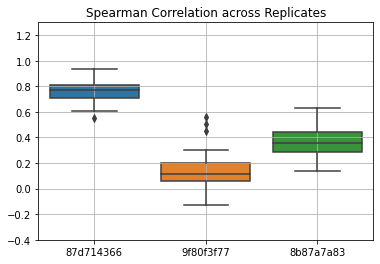

In [ ]:
sns.boxplot(data = corr_df)
plt.grid()
plt.title('Spearman Correlation across Replicates')
plt.ylim([-0.4,1.3])
plt.savefig('correlations.png',bbox_inches='tight',dpi=300)
